In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# Load the data
train_data = pd.read_csv("/kaggle/input/competitions/titanic/train.csv")

# Preview the data to make sure it loaded
train_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


## Data visualization
Now that I've imported the data I need to visualize them for the next step

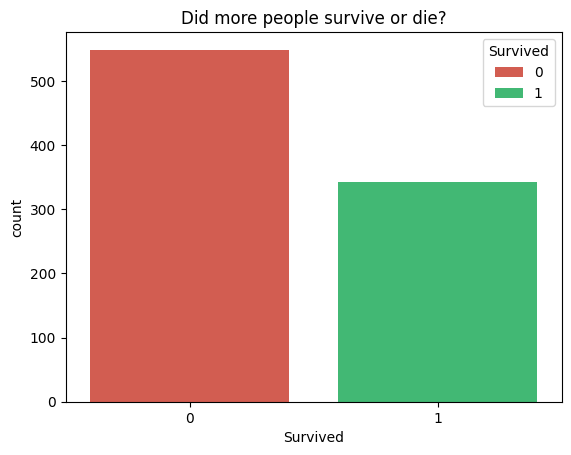

In [3]:
custom_palette = {0: "#E74C3C", 1: "#2ECC71"}
sns.countplot(x='Survived', data=train_data, hue='Survived', palette=custom_palette)
plt.title("Did more people survive or die?")
plt.show()

From the graph I notice that there is a 60% chance that a person would **NOT** survive. Now I need to choose some features to test the survival rate so I can decide to use which one in my model training

My first theory is about gender: **Who has more chance to survive women or man ?**

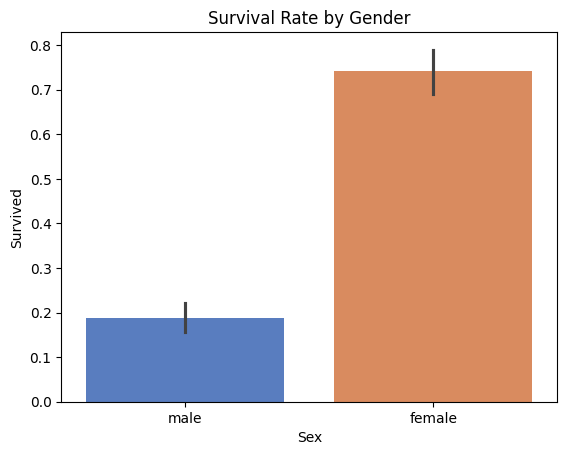

In [4]:
sns.barplot(x='Sex',hue='Sex', legend=False, y='Survived', data=train_data, palette="muted")
plt.title("Survival Rate by Gender")
plt.show()

I noticed that the survival rate for women is suprising high compare to their counterpart. This indicate that the model should use the **Sex** feature <br>
Next I want to see the **class rate (Pclass) effect on survival rate** 

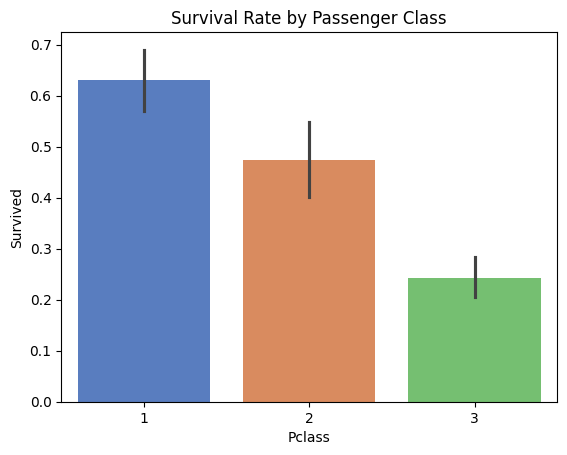

In [5]:
sns.barplot(x='Pclass', y='Survived', hue='Pclass', data=train_data, palette="muted", legend=False)
plt.title("Survival Rate by Passenger Class")
plt.show()

It seems that the higher the class rate the higher the chance of survival so the class rate also affect the survival rate.Thus **PClass** feature is also important for the model<br>
My final test is about the age distribution: **Which age group is more protized ?**

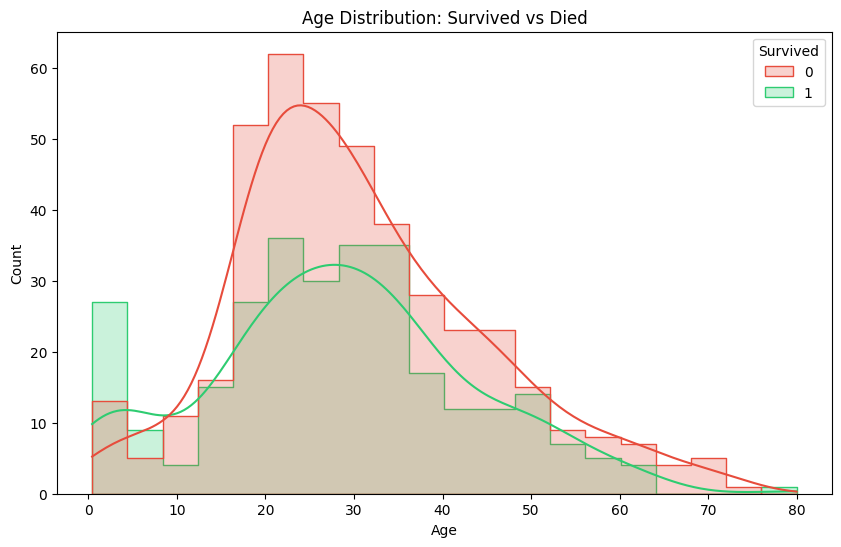

In [6]:
plt.figure(figsize=(10,6))
sns.histplot(data=train_data, x='Age', hue='Survived', kde=True, palette=custom_palette, element="step")
plt.title("Age Distribution: Survived vs Died")
plt.show()

From the diagram, it is clearly that the children age group mostly from **0 - 10** has more chance to survived and the middle age from **20 - 40** has less chance. The red line and green line is not identical so **Age** is a valueable feature

## Data cleaning
Now that I've completed the data visualize for deciding the features, I need to take a closer look to the data itself for the processing step

In [7]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


I noticed that there is some NaN value in 3 main columns: **Age** (177 values), **Cabin** (687 values) and **Embarked** (2 values). 

Since the missing data in **Cabin** is to many, I decide to delete this column and not take it into the training.

In [8]:
# 1. DROP CABIN COLUMN
train_data.drop(columns=['Cabin'], inplace=True)

Since 2 missing values from **Embark** is insignificant compared to 891 total values, I will delete those rows with null value.

In [9]:
# 2. DROP ROWS WITH MISSING EMBARKED
train_data.dropna(subset=['Embarked'], inplace=True)

For **Age**, I will fill the null value with the median age of the dataset

In [10]:
# 3. FILL AGE WITH MEDIAN
# We calculate the median first
age_median = train_data['Age'].median()
# Then we fill the holes
train_data.fillna({'Age':age_median}, inplace=True)

In [11]:
# VERIFY
print(train_data.isnull().sum())

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64


Now that my data is clean, I will move on the next step: **converting text to number**. There are 2 main columns with text that I need to convert: **Sex** and **Embark**. However I don't know if **Embark** is useful for the training so I will run a quick visualisation here.

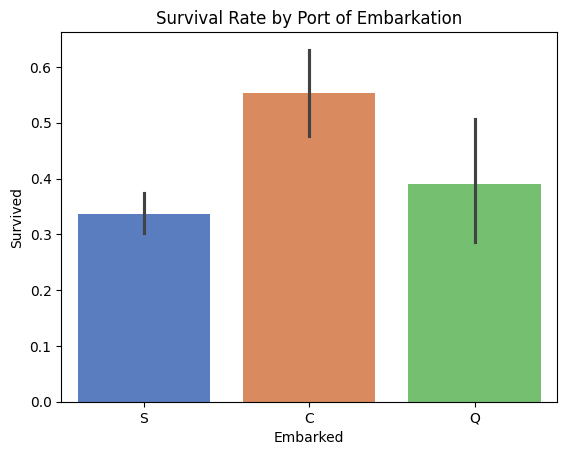

In [12]:
sns.barplot(x='Embarked', y='Survived', hue='Embarked', legend=False, data=train_data, palette="muted")
plt.title("Survival Rate by Port of Embarkation")
plt.show()

As the graph show, the C (Cherbourg) port has a higher survival rate than the others so **Embark** also matters.

Now I will first convert the **Sex** value to number with **0** for **Male** and **1** for **Female**

In [13]:
train_data['Sex']=train_data["Sex"].map({"male":0,"female":1})

Next, I will convert the **Embark** value to number

In [14]:
train_data['Embarked'] = train_data['Embarked'].map({'S': 0, 'C': 1, 'Q': 2})

In [15]:
# Verify
print(train_data.head())

   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name  Sex   Age  SibSp  Parch  \
0                            Braund, Mr. Owen Harris    0  22.0      1      0   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...    1  38.0      1      0   
2                             Heikkinen, Miss. Laina    1  26.0      0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)    1  35.0      1      0   
4                           Allen, Mr. William Henry    0  35.0      0      0   

             Ticket     Fare  Embarked  
0         A/5 21171   7.2500         0  
1          PC 17599  71.2833         1  
2  STON/O2. 3101282   7.9250         0  
3            113803  53.1000         0  
4            373450   8.0500         0  


## Model Training
Now that I have the processed data, the next step is use them for model training.<br>
First, I will select the features and target

In [16]:
# 1. SELECT FEATURES (X)
features = ['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked']
X = train_data[features]

# 2. SELECT TARGET (y)
y = train_data['Survived']

Next, I need to split the data: 80% to teach the model, 20% to test it (Validation)

In [17]:
from sklearn.model_selection import train_test_split
# 3. SPLIT DATA
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=1)

And then I will choose a model to train with these data, in this case I choose Random Forest due to the **Non-Linearity** and the **Interaction** of the survival rate and also after it trains, this model can tell **which column is the most important**  

In [18]:
from sklearn.ensemble import RandomForestClassifier
# 4. TRAIN THE MODEL
model = RandomForestClassifier(n_estimators=100, max_depth=5, random_state=1)
model.fit(X_train, y_train)

RandomForestClassifier(max_depth=5, random_state=1)

Finally, I use the other 20% of the dataset to evaluate the performance of the model

In [19]:
from sklearn.metrics import accuracy_score
# 5. EVALUATE
predictions = model.predict(X_val)
accuracy = accuracy_score(y_val, predictions)
print(f"Model Accuracy: {accuracy:.2%}")

Model Accuracy: 83.71%


## Fine-tune Model
I've obtained my first model with an accuracy of 83.71% however to increase the performance of the model there are some improvments need to be made. This is where the **Feature Engineering** come into place.<br>
I'm going to create two new feature: **Title** (extracting from **Name**) and **FamilySize** (combining **Sibsp** and **Parch**)

In [20]:
# 1. EXTRACT TITLE
train_data['Title'] = train_data['Name'].str.extract(r' ([A-Za-z]+)\.', expand=False)
print(train_data.groupby('Title')['Survived'].mean())

Title
Capt        0.000000
Col         0.500000
Countess    1.000000
Don         0.000000
Dr          0.428571
Jonkheer    0.000000
Lady        1.000000
Major       0.500000
Master      0.575000
Miss        0.696133
Mlle        1.000000
Mme         1.000000
Mr          0.156673
Mrs         0.790323
Ms          1.000000
Rev         0.000000
Sir         1.000000
Name: Survived, dtype: float64


From the result, it is noticable that the survival rate of boy **Master** is much higher than man **Mr** also I need to regroup some titles with the same meaning into one group such as **Mme** and **Mrs**

In [21]:
def simplify_title(title):
    if title in ['Mr']:
        return 0
    elif title in ['Miss', 'Mlle', 'Ms']:
        return 1
    elif title in ['Mrs', 'Mme']:
        return 2
    elif title in ['Master']:
        return 3
    else:
        return 4 # Rare titles like Dr, Rev, Col

train_data['Title_Code'] = train_data['Title'].apply(simplify_title)
# Check the new column
print(train_data[['Name', 'Title_Code']].head())

                                                Name  Title_Code
0                            Braund, Mr. Owen Harris           0
1  Cumings, Mrs. John Bradley (Florence Briggs Th...           2
2                             Heikkinen, Miss. Laina           1
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)           2
4                           Allen, Mr. William Henry           0


Next I need to calculate the family size by combining Sibling/Spouse (**SibSp**) and Parent/Children (**Parch**) plus 1 (the passenger) and I need to also check if it matters in the training.

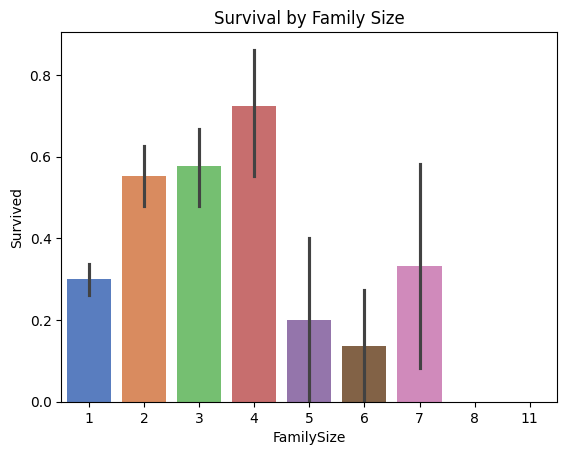

In [22]:
# 2 ADD FAMILY SIZE
train_data['FamilySize'] = train_data['SibSp'] + train_data['Parch'] + 1
sns.barplot(x='FamilySize', hue='FamilySize', legend=False, y='Survived', data=train_data, palette="muted")
plt.title("Survival by Family Size")
plt.show()

As the graph show, family size also matters in this case. Now lets add new feature into the model

In [23]:
features_v2 = ['Pclass', 'Title_Code', 'FamilySize', 'Fare', 'Embarked']

X = train_data[features_v2]
y = train_data['Survived']

In [24]:
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=1)

In [25]:
model_v2 = RandomForestClassifier(n_estimators=100, max_depth=5, random_state=1)
model_v2.fit(X_train, y_train)

# NEW SCORE
predictions_v2 = model_v2.predict(X_val)
accuracy_v2 = accuracy_score(y_val, predictions_v2)

print(f"Old Accuracy: 83.71%")
print(f"New Accuracy: {accuracy_v2:.2%}")

Old Accuracy: 83.71%
New Accuracy: 84.27%


So the accuracy has increased by about 0.5% which means the feature engineer has worked. Hooray !!!

## Logistic Regression
Now I want to experiment with other models to see if I can improve the accuracy

In [26]:
## Logistic Regression
from sklearn.linear_model import LogisticRegression
model_v3 = LogisticRegression(max_iter=1000, random_state=1)
model_v3.fit(X_train, y_train)

predictions = model_v3.predict(X_val)
accuracy = accuracy_score(y_val, predictions)
print(f"Model Accuracy: {accuracy:.2%}")

Model Accuracy: 69.66%


So the accuracy dropped down to 69% however I can improve this accuracy by scale the data since in Logistic Regression the higher value affects more (Ex Fare 500 affect more than Pclass 1). Thus, I will scale the data.

In [27]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)

# We ONLY "transform" the validation data (using the rules learned from training)
X_val_scaled = scaler.transform(X_val)

model_v3.fit(X_train_scaled, y_train)
predictions = model_v3.predict(X_val_scaled)
accuracy = accuracy_score(y_val, predictions)
print(f"Model Accuracy: {accuracy:.2%}")

Model Accuracy: 69.66%


In the end the model accuracy didn't change. I can conclude that the shape of the data in this problem is not suitable for Logistic Regression.

## Real test

Now I will perform the exactly the same actions from data processing to model training to the real dataset 

In [28]:
test_data=pd.read_csv("/kaggle/input/competitions/titanic/test.csv")
test_data.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [29]:
# Check for null values
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.1+ KB


In [30]:
# Fill Age and Fare with median value
median_age = test_data["Age"].median()
median_fare = test_data["Fare"].median()
test_data=test_data.fillna({"Age":median_age, "Fare":median_fare})

In [31]:
# Extract Titile from Name
test_data['Title'] = test_data['Name'].str.extract(r' ([A-Za-z]+)\.', expand=False)
test_data['Title_Code'] = test_data['Title'].apply(simplify_title)

In [32]:
# Create Family Size
test_data['FamilySize'] = test_data['SibSp'] + test_data['Parch'] + 1

In [33]:
# Convert Embarked
test_data['Embarked'] = test_data['Embarked'].map({'S': 0, 'C': 1, 'Q': 2})

In [34]:
# Select features
X_test_final = test_data[features_v2]

In [35]:
final_predictions = model_v2.predict(X_test_final)

# Create the final dataframe Kaggle expects
submission = pd.DataFrame({
    'PassengerId': test_data['PassengerId'],
    'Survived': final_predictions
})

# Save to CSV
submission.to_csv('submission.csv', index=False)